In [23]:
import linearsolver as ls
import numpy as np
import matplotlib.pyplot as plt


n = 100
A_ = np.random.normal(size=(n**2)).reshape(n, n)
A = A_.T @ A_
# A = np.array(
#     [
#         [3, 0, -1, -1, 0, -1],
#         [0, 2, 0, -1, 0, 0],
#         [-1, 0, 3, 0, -1, 0],
#         [-1, -1, 0, 2, 0, -1],
#         [0, 0, -1, 0, 3, 1],
#         [-1, 0, 0, -1, -1, 4],
#     ],
#     dtype=float,
# )

x = np.random.normal(size=n)
x0 = np.random.normal(size=n)
b = A @ x
print(np.linalg.cond(A))
x_cg, res = ls.conjGrad(A, x0, b, 1e-7, 3*n, True)
((x_cg - x)**(2)).mean()

4501284.566607102
Condition number of A: 4501284.566607102
It:    20, ||r|| = 21.61541558165856
It:    40, ||r|| = 8.521862744281947
It:    60, ||r|| = 4.284268387848468
It:    80, ||r|| = 2.0480347310360028
It:   100, ||r|| = 0.5414405355114582
It:   120, ||r|| = 0.42035335820050795
It:   140, ||r|| = 0.21953249320171564
It:   160, ||r|| = 0.12846063602666197
It:   180, ||r|| = 0.32641211845471857
It:   200, ||r|| = 0.1137318554370882
It:   220, ||r|| = 0.11559752493925006
It:   240, ||r|| = 0.13704581617401515
It:   260, ||r|| = 0.03710852668455821
It:   280, ||r|| = 0.024667131301493343
It:   300, ||r|| = 0.05541497682739017
It:   320, ||r|| = 0.17994772932255768
It:   340, ||r|| = 0.00015119367753584225
It:   360, ||r|| = 0.00010007507346959982
It:   380, ||r|| = 2.1318684255827608e-06
It:   400, ||r|| = 1.133809420391298e-07
It:   410, ||r|| = 6.993154053278178e-08


6.989364863400635e-18

In [74]:
U, S, VT = np.linalg.svd(A)
r= n // 2
Ur, Sr, Vr = U[:, r:], S[r:], VT.T[:, r:]

In [75]:
projector = Ur @ np.diag(Sr**(-1)) @ Ur.T

In [76]:
# projector = prec(x)
# b = -self.gradient(x)
# second_term = projector @ b
# orth_proj = np.eye(self.n) - projector
# A_matrix = GtG @ orth_proj
# cg_solution = solve_cg(A_matrix, orth_proj.T @ b, maxiter=iter_inner)
# return cg_solution[0] + second_term, cg_solution[1]

In [77]:
second_term = projector @ b
orth_proj = np.eye(n) - projector
A_matrix = A @ orth_proj
x_cg_baseline = ls.solve_cg(A, b, maxiter=5*n, verbose=False)[0]
x_cg_def_lhs = ls.solve_cg(A_matrix, orth_proj.T @ b, maxiter=5*n, verbose=False)[0]
x_cg_def = projector @ x_cg_def_lhs + second_term
print(((x_cg_def - x_cg_baseline)**2).sum())

8165947.677849213


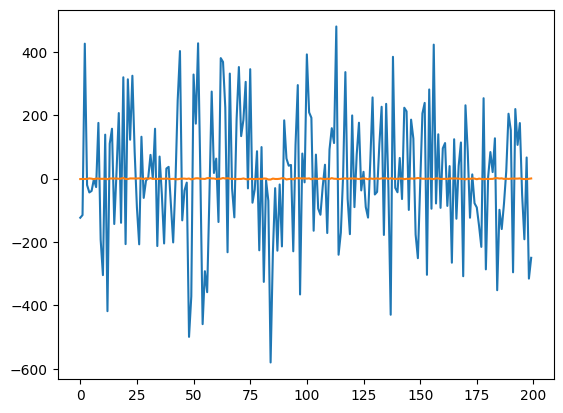

In [78]:
plt.plot(x_cg_def)
plt.plot(x_cg_baseline)